<div class="alert alert-block alert-info">

<font size=12>  <b> Data Science Ⅱ - 221007 검정 </b>
<hr>

<font size=3> **이하 모든 실기문제는 답이 수치일 경우 소수점 셋째자리에서 반올림하여 둘째자리까지 구하세요.(단, 답이 정수일 경우는 그대로 쓰세요)**<br>
<blockquote>
    <b> <예시> </b> <br>
        <br>
- 답이 5인 경우 → 5 <br>
- 답이 5.1인 경우 → 5.10 <br>
- 답이 5.10인 경우 → 5.10 <br>
- 답이 5.105인 경우 → 5.11</blockquote>

<div class="alert alert-block alert-success">
    <font size=3> <b> 이 exam 파일은 다음과 같이 구성되어 있습니다.<blockquote>
    - Problem 1 ~ 8 <br>
        <br>
    - 답안 제출 및 확인 코드  <br>
        <br>
    - Appendix: Jupyter API 검색 팁 </blockquote>
</div>

<div class="alert alert-block alert-warning">
<font size=3> <b>
exam 파일을 초기화하고 다시 문제를 풀고 싶으시면 파일 브라우저(Ctrl+Shift+F) 상단의 New Launcher(➕ 버튼)를 클릭하셔서 Exam File을 클릭하세요.
<b>
</div>

<div class="alert alert-block alert-danger">
    <font size=3> <b> 본 시험은 모두 단답형 문제로 구성되어 있습니다. 👇아래는 답안을 생성하는 코드입니다. 실행하세요! </b></font> <br>
</div>

In [ ]:
# 이 셀을 실행한 후 답안을 작성해주세요

# 작성된 답안을 저장할 딕셔너리
answer_data = {
    '문제_1': "",
    '문제_2': "",
    '문제_3': "",
    '문제_4-1': "",
    '문제_4-2': "",
    '문제_5': "",
    '문제_6': "",
    '문제_7-1': "",
    '문제_7-2': "",
    '문제_8': ""
    }

<div class="alert alert-block alert-warning">
<b>  <예시> <br>
     빈칸인 상태: answer_data['문제_1']="" <br>
     빈칸에 단답형 답안 작성: answer_data['문제_1']="123"
<b>
</div>

<div class="alert alert-block alert-info">
<font size=3> <b> 👇아래는 문제풀이에 사용될 파이썬 패키지를 import하는 코드입니다. 실행하세요!
<b>
</div>

In [ ]:
# 이 셀을 실행하세요 (원하면 추가로 import 하세요)

# 범용 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.cloud.bigquery.job import QueryJobConfig
from samsung.bdp_bigquery_client import BdpBigQueryClient
from google.cloud import bigquery

# 통계 분석 패키지
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 머신러닝 패키지
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

<div class="alert alert-block alert-warning">
    <font size=3> <b> 👇본 시험에서 테이블을 읽어오는 쿼리는 아래 코드를 사용하세요. </b></font> <br>
</div>

>```python
>client = BdpBigQueryClient()
>
># table_id는 읽어올 테이블 이름을 사용하세요
>table_id = "satti-bigdata-dsc.bigdata_dsc_exams.table_name_example"
>query = f"SELECT * FROM `{table_id}`"
>job_config = QueryJobConfig(dry_run=True, use_query_cache=False)
>query_job = client.query(query=query, job_config=job_config)
>
># 데이터프레임 res_df로 저장
>res_df = client.query(query)
>```

<div class="alert alert-block alert-success">
    <br><font size=10> <b>이제 문제가 시작됩니다! </b> </font>
    <br>
</div>

---
<font size = 3> 주어진 데이터셋 data1(`satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_stat1`) 는 2022년 8월 22일부터 2022년 8월 28일까지의 일주일 간의 삼성 헬스 피트니스 사용자들의 일일 사용 기록을 나타낸 데이터이며 data2(`satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_stat2`) 는 data1 사용자들의 개인정보 및 일주일 간의 활동 데이터에 대한 데이터이다. data1, data2의 각 컬럼에 대한 설명은 아래와 같다.

| **data1 컬럼** | **정의**   |
|:-----------:|---------------|
|  guid | 사용자 guid |
| timestamp_date |    사용 일자   |
|     daily_fitness_duration   |       해당 사용 일자의 피트니스 사용 시간(단위: 초)       |

| **data2 컬럼** | **정의**   |
|:-----------:|---------------|
|  guid | 사용자 guid |
| birth_year |    출생년도  |
|     gender   |       성별('M':남성, 'F':여성)       |
|      group      |       그룹('treatment':실험군, 'control':대조군)       |
| weekly_step_count           |  '2022-08-22' ~ '2022-08-28' 일주일 간의 걸음 수             |

---
# Problem 1
<font size=3> data1 에서 각 사용자들의 일주일 간의 피트니스 사용 시간의 합계를 구하여 분포를 관찰하였을 때 양의 왜도(skewness)를 갖는 right-skewed 이면 right를, 음의 왜도를 갖는 left-skewed 이면 left를 입력하시오. (Hint: pandas Dataframe의 hist 함수를 사용하여 데이터의 분포를 시각화할 수 있다.) (10점)

array([[<AxesSubplot: title={'center': 'daily_fitness_duration'}>]],
      dtype=object)

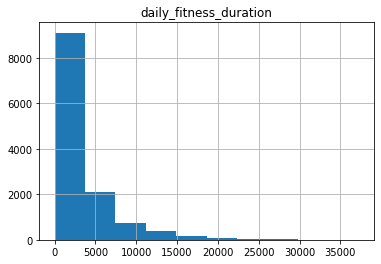

In [6]:
df = pd.read_csv("ds2_221007_stat1.csv")
df.head()
df.hist()

array([[<AxesSubplot: title={'center': 'daily_fitness_duration'}>]],
      dtype=object)

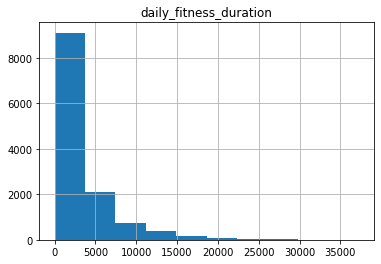

In [ ]:
# 문제 풀이 셀

df1 = pd.read_csv('ds2_221007_stat1.csv')

df1.head()

df1.hist()

In [ ]:
df1.head()

guid timestamp_date  daily_fitness_duration
0  57ofwq3u5k     2022-08-27                    1772
1  urudpywha3     2022-08-24                     574
2  pzjkzzv4bg     2022-08-24                    8778
3  bmagxhjghv     2022-08-26                    6089
4  hkgmgaxu3t     2022-08-26                     182

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [5]:
answer_data['문제_1']="right"

---
# Problem 2
<font size=3> 주어진 두 테이블(data1, data2)을 활용하여 전체 30세 미만 피트니스 사용자들 중 매일 피트니스를 사용한 사용자의 비율을 다음과 같이 추정하고자 한다.
    
> Step 1. 30세 미만이면서 대조군에 속한 사용자로 필터링 <br>
> Step 2. Step 1의 사용자 중 매일 피트니스를 사용한 사용자의 비율 구하기 <br>
> Step 3. Step 1의 사용자군을 표본이라 할 때, 전체 30세 미만 피트니스 사용자들 중 매일 피트니스를 사용한 사용자의 모비율에 대한 95% 신뢰구간 $(a,b)$ 구하기.

<font size=3> $a$를 구하시오. (나이는 2022 에서 출생년도를 뺀 숫자이며 $P(Z \geq 1.64) = 0.05, P(Z \geq 1.96) = 0.025$ 임을 이용하시오) (10점)

In [ ]:
df1 = pd.read_csv("ds2_221007_stat1.csv")
df2 = pd.read_csv("ds2_221007_stat2.csv")
df = pd.merge(df1, df2)
df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [7]:
df[(df.group == 'control') & (df.birth_year >= 1993)].groupby('guid').count()

timestamp_date  daily_fitness_duration  birth_year  gender  group  \
guid                                                                            
0bypepncfj               4                       4           4       4      4   
0rpellvrij               4                       4           4       4      4   
12u7bjv1a8               4                       4           4       4      4   
1a7ukwiee0               3                       3           3       3      3   
1b731kshw0               4                       4           4       4      4   
...                    ...                     ...         ...     ...    ...   
zshwsmhjao               5                       5           5       5      5   
ztkybib1q1               3                       3           3       3      3   
ztntuycxl8               4                       4           4       4      4   
zyhg8ktcs9               7                       7           7       7      7   
zzbsdccgrx               3                       3           3       3      3   

            weekly_step_count  
guid                           
0bypepncfj                  4  
0rpellvrij                  4  
12u7bjv1a8                  4  
1a7ukwiee0                  3  
1b731kshw0                  4  
...                       ...  
zshwsmhjao                  5  
ztkybib1q1                  3  
ztntuycxl8                  4  
zyhg8ktcs9                  7  
zzbsdccgrx                  3  

[312 rows x 6 columns]

In [ ]:
df[(df.group == 'control') & (df.birth_year >= 1993) ].groupby('guid').count() #312

timestamp_date  daily_fitness_duration  birth_year  gender  group  \
guid                                                                            
0bypepncfj               4                       4           4       4      4   
0rpellvrij               4                       4           4       4      4   
12u7bjv1a8               4                       4           4       4      4   
1a7ukwiee0               3                       3           3       3      3   
1b731kshw0               4                       4           4       4      4   
...                    ...                     ...         ...     ...    ...   
zshwsmhjao               5                       5           5       5      5   
ztkybib1q1               3                       3           3       3      3   
ztntuycxl8               4                       4           4       4      4   
zyhg8ktcs9               7                       7           7       7      7   
zzbsdccgrx               3                       3           3       3      3   

            weekly_step_count  
guid                           
0bypepncfj                  4  
0rpellvrij                  4  
12u7bjv1a8                  4  
1a7ukwiee0                  3  
1b731kshw0                  4  
...                       ...  
zshwsmhjao                  5  
ztkybib1q1                  3  
ztntuycxl8                  4  
zyhg8ktcs9                  7  
zzbsdccgrx                  3  

[312 rows x 6 columns]

In [22]:
a = df[(df.group == 'control') & (df.birth_year >= 1993)].groupby('guid').count()

a[a.timestamp_date == 7].count() #53

timestamp_date            53
daily_fitness_duration    53
birth_year                53
gender                    53
group                     53
weekly_step_count         53
dtype: int64

In [ ]:
p = 53/312

p - (1.96 * np.sqrt(p * (1-p) / 312))

0.12820289858289335

In [24]:
np.sqrt(4)

2.0

In [24]:
df2 = pd.read_csv("ds2_221007_stat2.csv")

In [25]:
df = pd.merge(df1, df2)

df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [6]:
#step1

dfa = df[(df['birth_year'] > 1992) & (df['group'] == 'control')]
dfa.nunique() #312

guid                       312
timestamp_date               7
daily_fitness_duration    1229
birth_year                  13
gender                       2
group                        1
weekly_step_count          312
dtype: int64

In [23]:
#step2

dfb = dfa.groupby('guid').count()

len(dfb[dfb['timestamp_date'] == 7]) #53



53

In [26]:
df2 = pd.read_csv('ds2_221007_stat2.csv')
df2.head()

guid  birth_year gender      group  weekly_step_count
0  7eqipetrqg        1982      M  treatment              90216
1  rmwwamhqyu        1989      M  treatment              68510
2  v3ftd1mmuz        1985      F    control              37972
3  fynlcy4umi        1977      F  treatment              40470
4  kzgrtskfhp        1970      M  treatment              39506

In [7]:
df = pd.merge(df1, df2)
df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [ ]:
# 30세 미만이면서 대조군 : 312
a = df['birth_year'] > 1992
b = df['group'] == 'control'

s1 = df[a & b]
s1.groupby('guid').count()

timestamp_date  daily_fitness_duration  birth_year  gender  group  \
guid                                                                            
0bypepncfj               4                       4           4       4      4   
0rpellvrij               4                       4           4       4      4   
12u7bjv1a8               4                       4           4       4      4   
1a7ukwiee0               3                       3           3       3      3   
1b731kshw0               4                       4           4       4      4   
...                    ...                     ...         ...     ...    ...   
zshwsmhjao               5                       5           5       5      5   
ztkybib1q1               3                       3           3       3      3   
ztntuycxl8               4                       4           4       4      4   
zyhg8ktcs9               7                       7           7       7      7   
zzbsdccgrx               3                       3           3       3      3   

            weekly_step_count  
guid                           
0bypepncfj                  4  
0rpellvrij                  4  
12u7bjv1a8                  4  
1a7ukwiee0                  3  
1b731kshw0                  4  
...                       ...  
zshwsmhjao                  5  
ztkybib1q1                  3  
ztntuycxl8                  4  
zyhg8ktcs9                  7  
zzbsdccgrx                  3  

[312 rows x 6 columns]

In [ ]:
# s1에서 매일(일주일) 피트니스 사용한 사용자 : 53
s2 = s1.groupby('guid').count()
len(s2[s2['timestamp_date'] == 7])

53

In [34]:
p = 53/312

p - 1.96 * ((p * (1-p) / 312) ** 0.5)

0.12820289858289335

In [ ]:
answer_data['문제_2']="0.13"

In [ ]:
###########소정언니 풀이###############

df2 = pd.read_csv('ds2_221007_stat2.csv')

df2.head()

guid  birth_year gender      group  weekly_step_count
0  7eqipetrqg        1982      M  treatment              90216
1  rmwwamhqyu        1989      M  treatment              68510
2  v3ftd1mmuz        1985      F    control              37972
3  fynlcy4umi        1977      F  treatment              40470
4  kzgrtskfhp        1970      M  treatment              39506

In [12]:
df3 = pd.merge(df, df2)
df3.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [ ]:
a = df3['birth_year'] > 1992
b = df3['group'] == 'control'

df4 = df3[a & b]

In [ ]:
df5 = df4.groupby('guid').count()

In [ ]:
len(df5[df5['timestamp_date']==7])

53

In [19]:
len(df5)

312

In [ ]:
p = 53/312

In [23]:
ans = p - 1.96 * l

In [22]:
l = np.sqrt(p * (1-p) / 312)

In [24]:
print(ans)

0.12820289858289335


In [ ]:
# 문제 풀이 셀




 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_2']="답을 여기 넣어요"

---
# Problem 3
<font size=3> 당사는 삼성 헬스 피트니스 사용자의 경험 개선을 위해 새로운 UI를 도입하고자 A/B 테스트를 수행하여 일주일 간의 총 피트니스 사용시간에 변화가 있는지 알아보기로 하였다. 대조군(기존 UI 사용자)과  실험군(새로운 UI 사용자) 은 data2 의 `group` 컬럼에 각각 'control', 'treatment' 값을 가진다. 그 결과 남성 사용자와 여성 사용자 그룹 각각 대조군 대비 실험군의 일주일 간 총 피트니스 사용시간의 평균의 $x\%$, $y\%$ 증가 혹은 감소를 관찰할 수 있었다. $x$ 와 $y$의 정수 부분을 각각 구하시오. (10점)
> 답안 작성 예시: 만약 남성과 여성 사용자 그룹에서 각각 9.87 % 증가, 7.50 % 감소가 관찰된다면 답은 세미콜론(;)으로 구분하여 공백을 추가하지 않고 "9;7"로 작성한다.

In [8]:
df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [11]:
df[(df.gender == 'M') & (df.group == 'control')].groupby('guid').sum().mean()

daily_fitness_duration     12871.345609
birth_year                  8555.725212
weekly_step_count         270107.815864
dtype: float64

In [13]:
# 남성 사용자 그룹 대조군 대비 실험군의 일주일 간 총 피트니스 사용시간의 평균
a = df[(df.gender == 'M') & (df.group == 'control')].groupby('guid')['daily_fitness_duration'].sum().mean()

12871.345609065156

In [38]:
b= df[(df.gender == 'M') & (df.group == 'treatment')].groupby('guid')['daily_fitness_duration'].sum().mean()

In [40]:
(b-a) / a * 100

5.722916790899971

In [ ]:
# 여성 사용자 그룹 대조군 대비 실험군의 일주일 간 총 피트니스 사용시간의 평균

In [41]:
c = df[(df.gender == 'F') & (df.group == 'control')].groupby('guid')['daily_fitness_duration'].sum().mean()

In [ ]:
d = df[(df.gender == 'F') & (df.group == 'treatment')].groupby('guid')['daily_fitness_duration'].sum().mean()

In [ ]:
(d-c)/ c * 100

4.256713654571959

In [ ]:
# 문제 풀이 셀

df.head()



guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [ ]:
male1 = df[(df['gender'] == 'M') & (df['group'] == 'control')]
maa = male1.groupby('guid').sum()['daily_fitness_duration'].mean()

In [39]:
male2 = df[(df['gender'] == 'M') & (df['group'] == 'treatment')]
mab = male2.groupby('guid').sum()['daily_fitness_duration'].mean()

In [ ]:
(mab - maa) / maa

0.05722916790899971

In [11]:
fema1 = df[(df['gender'] == 'F') & (df['group'] == 'control')]
fea = fema1.groupby('guid').sum()['daily_fitness_duration'].mean()

In [12]:
fema2 = df[(df['gender'] == 'F') & (df['group'] == 'treatment')]
feb = fema2.groupby('guid').sum()['daily_fitness_duration'].mean()

In [ ]:
(feb - fea) / fea

0.042567136545719586

In [ ]:
# 남성 대조군(control) 대비 실험군(treatment)의 일주일간 총 피트니스 사용시간의 평균 비교 
male = df[(df['gender'] == 'M') & (df['group'] == 'control')] # ]
maco = male[male['group'] == 'control'].groupby('guid').sum('daily_fitness_duration').mean()
maco['daily_fitness_duration']

12871.345609065156

In [49]:
## and/or 조건 한 번에 쓰려면 ##5
df[(df['gender'] == 'M') & (df['group'] == 'control')]

guid timestamp_date  daily_fitness_duration  birth_year gender  \
28     tkq5xtgviz     2022-08-28                     995        2000      M   
29     tkq5xtgviz     2022-08-27                    1321        2000      M   
30     tkq5xtgviz     2022-08-26                    7429        2000      M   
31     tkq5xtgviz     2022-08-22                    3594        2000      M   
70     gpyaxoyncn     2022-08-25                      93        1977      M   
...           ...            ...                     ...         ...    ...   
12634  azskhbkqyr     2022-08-25                   12598        1979      M   
12640  jjwgtvhrga     2022-08-25                    3368        1988      M   
12641  jjwgtvhrga     2022-08-24                    5986        1988      M   
12646  ltlzl91smc     2022-08-28                   21806        1979      M   
12648  8rhijq0lzj     2022-08-25                    9660        1986      M   

         group  weekly_step_count  
28     control              81532  
29     control              81532  
30     control              81532  
31     control              81532  
70     control              49961  
...        ...                ...  
12634  control              45000  
12640  control              97627  
12641  control              97627  
12646  control              71855  
12648  control              36589  

[3042 rows x 7 columns]

In [ ]:
male = df[df['gender'] == 'M'] # & df['group'] == 'control']
matr = male[male['group'] == 'treatment'].groupby('guid').sum('daily_fitness_duration').mean()
matr['daily_fitness_duration']

13607.962008141112

In [ ]:
(matr['daily_fitness_duration'] - maco['daily_fitness_duration'])/ maco['daily_fitness_duration']

0.05722916790899971

In [40]:
fe = df3[df3['gender'] == 'F']

c = fe[fe['group'] == 'control'].groupby('guid').sum()['daily_fitness_duration'].mean()

t = fe[fe['group'] == 'treatment'].groupby('guid').sum()['daily_fitness_duration'].mean()


13829.80385078219

In [42]:
(t-c) / c

0.042567136545719586

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [30]:
#총 피트니스 사용시간 평균 대조
#남자 대조 -> 남자 실험
#여자 대조 -> 여자 실험

ma = df3[df3['gender'] == 'M']
maco = ma[ma['group'] == 'control']
m1 = maco.groupby('guid').sum()['daily_fitness_duration'].mean()
matr = ma[ma['group'] == 'treatment']
m2 = matr.groupby('guid').sum()['daily_fitness_duration'].mean()

In [32]:
(m2-m1) /m1 * 100

5.722916790899971

In [ ]:
answer_data['문제_3']="답을 여기 넣어요"

---
# Problem 4
<font size=3> (4-1) data1 과 data2 로부터 다음과 같은 단순 선형회귀모형 A를 적합하였다. 
    
<font size=3> A : `weekly_step_count`를 종속변수(반응변수) $y_i$, 일주일 간의 총 피트니스 사용 시간을 독립변수(설명변수) $x_i$로 하는 단순 선형회귀모형

<font size=3> A의 결정계수($R^2$)를 구하시오. (10점)
    
<font size=3> 단, $R^2$는 다음과 같이 정의된다. $y_i$는 종속변수 , $\hat y_i$는 적합값(Fitted value), $\bar y$는 $y_i$의 평균이라고 할 때 
#### $$ SSR := \sum_{i=1}^n (y_i - {\hat y_i})^2, \quad SST := \sum_{i=1}^n (y_i - \bar y)^2, \quad R^2 := 1 - \frac{SSR}{SST}. $$

In [ ]:
df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [52]:
df4 = df.groupby('guid').agg({'weekly_step_count' : 'mean', 'daily_fitness_duration' : 'sum'})
df4.head()

weekly_step_count  daily_fitness_duration
guid                                                 
00zphkpldv            43860.0                   12681
03jewezuk5            89003.0                   18353
06hvdr5bcq            79754.0                   23449
07yyfgo7ji            25246.0                    1926
0aqsdmhtxg            47451.0                   10167

In [56]:
x = df4[['daily_fitness_duration']]
y = df4['weekly_step_count']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.2853940228824964

In [2]:
df1 = pd.read_csv("ds2_221007_stat1.csv")
df2 = pd.read_csv("ds2_221007_stat2.csv")

df3 = pd.merge(df1,df2)

df3

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0      57ofwq3u5k     2022-08-27                    1772        1986      M   
1      57ofwq3u5k     2022-08-28                     332        1986      M   
2      57ofwq3u5k     2022-08-24                    1784        1986      M   
3      57ofwq3u5k     2022-08-25                    1048        1986      M   
4      57ofwq3u5k     2022-08-26                    3781        1986      M   
...           ...            ...                     ...         ...    ...   
12653  5jt09djbu3     2022-08-22                   21380        1973      F   
12654  sgxf936psi     2022-08-24                    9454        1985      F   
12655  qb4jtxyn1p     2022-08-23                   18539        1978      F   
12656  8wvjbh8tmf     2022-08-28                   10003        1975      M   
12657  beg7ntrlne     2022-08-26                    1240        1977      F   

           group  weekly_step_count  
0      treatment              34487  
1      treatment              34487  
2      treatment              34487  
3      treatment              34487  
4      treatment              34487  
...          ...                ...  
12653  treatment              52466  
12654  treatment              60719  
12655  treatment              57897  
12656  treatment              39641  
12657  treatment              49883  

[12658 rows x 7 columns]

In [6]:
df4 = df3.groupby('guid').agg({'daily_fitness_duration' : 'sum', 'weekly_step_count': 'mean'})

In [9]:
x = df4[['daily_fitness_duration']]
y = df4['weekly_step_count']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.2853940228824964

In [36]:
df4 = df.groupby('guid').agg({'weekly_step_count':'mean', 'daily_fitness_duration' : 'sum' })
df4.head()

weekly_step_count  daily_fitness_duration
guid                                                 
00zphkpldv            43860.0                   12681
03jewezuk5            89003.0                   18353
06hvdr5bcq            79754.0                   23449
07yyfgo7ji            25246.0                    1926
0aqsdmhtxg            47451.0                   10167

In [37]:
y = df4['weekly_step_count']
x = df4[['daily_fitness_duration']]

lr = LinearRegression()
lr.fit(x,y)

lr.score(x,y)

0.2853940228824964

In [66]:
# 문제 풀이 셀

df.head()

dfx = df.groupby('guid').agg({'daily_fitness_duration':'sum', 'weekly_step_count':'mean'})
dfx.head()


daily_fitness_duration  weekly_step_count
guid                                                 
00zphkpldv                   12681            43860.0
03jewezuk5                   18353            89003.0
06hvdr5bcq                   23449            79754.0
07yyfgo7ji                    1926            25246.0
0aqsdmhtxg                   10167            47451.0

In [65]:
df

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0      57ofwq3u5k     2022-08-27                    1772        1986      M   
1      57ofwq3u5k     2022-08-28                     332        1986      M   
2      57ofwq3u5k     2022-08-24                    1784        1986      M   
3      57ofwq3u5k     2022-08-25                    1048        1986      M   
4      57ofwq3u5k     2022-08-26                    3781        1986      M   
...           ...            ...                     ...         ...    ...   
12653  5jt09djbu3     2022-08-22                   21380        1973      F   
12654  sgxf936psi     2022-08-24                    9454        1985      F   
12655  qb4jtxyn1p     2022-08-23                   18539        1978      F   
12656  8wvjbh8tmf     2022-08-28                   10003        1975      M   
12657  beg7ntrlne     2022-08-26                    1240        1977      F   

           group  weekly_step_count  
0      treatment              34487  
1      treatment              34487  
2      treatment              34487  
3      treatment              34487  
4      treatment              34487  
...          ...                ...  
12653  treatment              52466  
12654  treatment              60719  
12655  treatment              57897  
12656  treatment              39641  
12657  treatment              49883  

[12658 rows x 7 columns]

In [89]:
x = dfx[['daily_fitness_duration']]
y = dfx['weekly_step_count']

lr = LinearRegression()

lr.fit(x,y)
lr.score(x,y)


1.3363475799345201

In [90]:
lr.coef_[0] # 기울기
lr.intercept_ # 절편

46077.494275580284

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [69]:
answer_data['문제_4-1']="0.29"

<font size=3> (4-2) (4-1) 에서 적합한 회귀모형 A의 적합도를 개선하기 위해 다음과 같은 과정을 거쳐서 다중 선형회귀모형 B를 적합하였다.
    
> Step 1. `weekly_step_count`를 종속변수(반응변수) $y_i$, 일주일 간의 총 피트니스 사용 시간과 `birth_year`를 각각 독립변수(설명변수) $x_{i1}, x_{i2}$로 하는 다중 선형회귀모형 적합 <br>
> Step 2. Step 1에서 적합한 모형의 잔차(residual, $y_i - \hat y_i$)를 관찰하였을 때, 제1사분위수에서 1.5$\cdot$IQR을 뺀 값보다 작거나 제3사분위수에 1.5$\cdot$IQR을 더한 값보다 큰 데이터를 제거하고 다중 선형회귀모형 B 적합
    
<font size=3> B의 결정계수($R^2$)를 구하시오. (10점)

In [5]:
df.head()

guid timestamp_date  daily_fitness_duration  birth_year gender  \
0  57ofwq3u5k     2022-08-27                    1772        1986      M   
1  57ofwq3u5k     2022-08-28                     332        1986      M   
2  57ofwq3u5k     2022-08-24                    1784        1986      M   
3  57ofwq3u5k     2022-08-25                    1048        1986      M   
4  57ofwq3u5k     2022-08-26                    3781        1986      M   

       group  weekly_step_count  
0  treatment              34487  
1  treatment              34487  
2  treatment              34487  
3  treatment              34487  
4  treatment              34487

In [ ]:
dfa = df.groupby('guid').agg({'weekly_step_count' : 'mean', 'daily_fitness_duration' : 'sum', 'birth_year' : 'mean'})

model_a = ols('weekly_step_count ~ daily_fitness_duration + birth_year',dfa).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     637.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          2.82e-231
Time:                        00:52:45   Log-Likelihood:                -33676.
No. Observations:                3000   AIC:                         6.736e+04
Df Residuals:                    2997   BIC:                         6.738e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.525e+05   8.06e+04     -6.855      0.000   -7.11e+05   -3.94e+05
daily_fitness_duration     1.3011      0.039     33.733      0.000       1.225       1.377
birth_year               301.7418     40.627      7.427      0.000     222.082     381.402
==============================================================================
Omnibus:                      313.056   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.058
Skew:                           0.822   Prob(JB):                     5.57e-95
Kurtosis:                       3.877   Cond. No.                     3.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
dfa['yhat'] = model_a.predict(dfa[['daily_fitness_duration', 'birth_year']])

In [15]:
dfa['res'] = dfa.weekly_step_count - dfa.yhat
dfa
dfa['iq1'] = np.quantile(dfa.res, 0.25)
dfa['iq3'] = np.quantile(dfa.res, 0.75)
dfa['iqr'] = dfa.iq3 - dfa.iq1
dfa

weekly_step_count  daily_fitness_duration  birth_year  \
guid                                                                
00zphkpldv            43860.0                   12681      1967.0   
03jewezuk5            89003.0                   18353      1991.0   
06hvdr5bcq            79754.0                   23449      1981.0   
07yyfgo7ji            25246.0                    1926      1985.0   
0aqsdmhtxg            47451.0                   10167      1988.0   
...                       ...                     ...         ...   
zyb5zvf19o            52886.0                    8000      1979.0   
zyhg8ktcs9            66758.0                   28953      1997.0   
zyhqeds1l1           119316.0                   19329      1988.0   
zzbsdccgrx            83798.0                   13999      1997.0   
zzfgudqqn4            25010.0                    2684      1984.0   

                    yhat           res           iq1           iq3  \
guid                                                                 
00zphkpldv  57545.071998 -13685.071998 -13304.016316  10523.611421   
03jewezuk5  72166.525294  16836.474706 -13304.016316  10523.611421   
06hvdr5bcq  75779.341736   3974.658264 -13304.016316  10523.611421   
07yyfgo7ji  48983.455001 -23737.455001 -13304.016316  10523.611421   
0aqsdmhtxg  60610.769476 -13159.769476 -13304.016316  10523.611421   
...                  ...           ...           ...           ...   
zyb5zvf19o  55075.681830  -2189.681830 -13304.016316  10523.611421   
zyhg8ktcs9  87768.281142 -21010.281142 -13304.016316  10523.611421   
zyhqeds1l1  72531.140670  46784.859330 -13304.016316  10523.611421   
zzbsdccgrx  68312.132830  15485.867170 -13304.016316  10523.611421   
zzfgudqqn4  49667.921561 -24657.921561 -13304.016316  10523.611421   

                     iqr  
guid                      
00zphkpldv  23827.627737  
03jewezuk5  23827.627737  
06hvdr5bcq  23827.627737  
07yyfgo7ji  23827.627737  
0aqsdmhtxg  23827.627737  
...                  ...  
zyb5zvf19o  23827.627737  
zyhg8ktcs9  23827.627737  
zyhqeds1l1  23827.627737  
zzbsdccgrx  23827.627737  
zzfgudqqn4  23827.627737  

[3000 rows x 8 columns]

In [18]:
dfb = dfa[(dfa.res >= dfa.iq1 - 1.5* dfa.iqr) & (dfa.res <= dfa.iq3 + 1.5* dfa.iqr)]
model_b = ols('weekly_step_count ~ daily_fitness_duration + birth_year', dfb).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     727.2
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          2.21e-257
Time:                        00:58:52   Log-Likelihood:                -32827.
No. Observations:                2948   AIC:                         6.566e+04
Df Residuals:                    2945   BIC:                         6.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.602e+05   7.42e+04     -7.549      0.000   -7.06e+05   -4.15e+05
daily_fitness_duration     1.2788      0.036     35.955      0.000       1.209       1.349
birth_year               305.2987     37.411      8.161      0.000     231.944     378.653
==============================================================================
Omnibus:                      120.966   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.928
Skew:                           0.491   Prob(JB):                     1.01e-28
Kurtosis:                       2.710   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df42 = df.groupby('guid').agg({'weekly_step_count' : 'mean', 'daily_fitness_duration' : 'sum', 'birth_year' : 'mean'})
df42.head()

weekly_step_count  daily_fitness_duration  birth_year
guid                                                             
00zphkpldv            43860.0                   12681      1967.0
03jewezuk5            89003.0                   18353      1991.0
06hvdr5bcq            79754.0                   23449      1981.0
07yyfgo7ji            25246.0                    1926      1985.0
0aqsdmhtxg            47451.0                   10167      1988.0
...                       ...                     ...         ...
zyb5zvf19o            52886.0                    8000      1979.0
zyhg8ktcs9            66758.0                   28953      1997.0
zyhqeds1l1           119316.0                   19329      1988.0
zzbsdccgrx            83798.0                   13999      1997.0
zzfgudqqn4            25010.0                    2684      1984.0

[3000 rows x 3 columns]

In [23]:
model = ols('weekly_step_count ~ daily_fitness_duration + birth_year', df42).fit()
#model.summary()  #model.params['birth_year']

In [24]:
df42['yhat'] = model.predict(df42[['daily_fitness_duration', 'birth_year']])

In [25]:
df42['res'] = df42.weekly_step_count - df42.yhat
df42['iq1'] = np.quantile(df42.res, 0.25)
df42['iq3'] = np.quantile(df42.res, 0.75)
df42['iqr'] = df42.iq3 - df42.iq1
df42.head()

weekly_step_count  daily_fitness_duration  birth_year  \
guid                                                                
00zphkpldv            43860.0                   12681      1967.0   
03jewezuk5            89003.0                   18353      1991.0   
06hvdr5bcq            79754.0                   23449      1981.0   
07yyfgo7ji            25246.0                    1926      1985.0   
0aqsdmhtxg            47451.0                   10167      1988.0   

                    yhat           res           iq1           iq3  \
guid                                                                 
00zphkpldv  57545.071998 -13685.071998 -13304.016316  10523.611421   
03jewezuk5  72166.525294  16836.474706 -13304.016316  10523.611421   
06hvdr5bcq  75779.341736   3974.658264 -13304.016316  10523.611421   
07yyfgo7ji  48983.455001 -23737.455001 -13304.016316  10523.611421   
0aqsdmhtxg  60610.769476 -13159.769476 -13304.016316  10523.611421   

                     iqr  
guid                      
00zphkpldv  23827.627737  
03jewezuk5  23827.627737  
06hvdr5bcq  23827.627737  
07yyfgo7ji  23827.627737  
0aqsdmhtxg  23827.627737

In [29]:
df5 = df42[(df42.res >= df42.iq1 - 1.5 * df42.iqr) & (df42.res <= df42.iq3 + 1.5 * df42.iqr)]
modelb = ols('weekly_step_count ~ daily_fitness_duration + birth_year', df5).fit()
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     727.2
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          2.21e-257
Time:                        04:25:19   Log-Likelihood:                -32827.
No. Observations:                2948   AIC:                         6.566e+04
Df Residuals:                    2945   BIC:                         6.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.602e+05   7.42e+04     -7.549      0.000   -7.06e+05   -4.15e+05
daily_fitness_duration     1.2788      0.036     35.955      0.000       1.209       1.349
birth_year               305.2987     37.411      8.161      0.000     231.944     378.653
==============================================================================
Omnibus:                      120.966   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.928
Skew:                           0.491   Prob(JB):                     1.01e-28
Kurtosis:                       2.710   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df4 = df3.groupby('guid').agg({'daily_fitness_duration' : 'sum', 'weekly_step_count': 'mean', 'birth_year':'mean'})

"""
x = df4[['daily_fitness_duration']]
y = df4['weekly_step_count']

lr = LinearRegression()

lr.fit(x,y)
lr.score(x,y)"""


model = ols('weekly_step_count~daily_fitness_duration+birth_year', df4).fit()

In [16]:
df4['yhat'] = model.predict(df4[['daily_fitness_duration', 'birth_year']])

In [ ]:
df4['res'] = df4['weekly_step_count'] - df4['yhat']

In [ ]:
under = np.quantile(df4['res'], 0.25)

In [19]:
upper = np.quantile(df4['res'], 0.75)

In [ ]:
iqr = upper - under

In [ ]:
df5 = df4[ (df4['res'] >= under - 1.5*iqr) & (df4['res'] <= upper + 1.5*iqr)]

In [22]:
model2 = ols('weekly_step_count~daily_fitness_duration+birth_year', df5).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     727.2
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          2.21e-257
Time:                        06:40:55   Log-Likelihood:                -32827.
No. Observations:                2948   AIC:                         6.566e+04
Df Residuals:                    2945   BIC:                         6.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.602e+05   7.42e+04     -7.549      0.000   -7.06e+05   -4.15e+05
daily_fitness_duration     1.2788      0.036     35.955      0.000       1.209       1.349
birth_year               305.2987     37.411      8.161      0.000     231.944     378.653
==============================================================================
Omnibus:                      120.966   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.928
Skew:                           0.491   Prob(JB):                     1.01e-28
Kurtosis:                       2.710   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
df5 = df.groupby('guid').agg({'weekly_step_count':'mean', 'daily_fitness_duration' : 'sum', 'birth_year' : 'mean' })
df5.head()

weekly_step_count  daily_fitness_duration  birth_year
guid                                                             
00zphkpldv            43860.0                   12681      1967.0
03jewezuk5            89003.0                   18353      1991.0
06hvdr5bcq            79754.0                   23449      1981.0
07yyfgo7ji            25246.0                    1926      1985.0
0aqsdmhtxg            47451.0                   10167      1988.0

In [43]:
model = ols('weekly_step_count ~ daily_fitness_duration + birth_year', df5).fit()

In [53]:
df5['yhat'] = model.predict(df5[['daily_fitness_duration', 'birth_year']])
df5['resi'] = df5['weekly_step_count'] - df5['yhat']

In [59]:
df5['iq1'] = np.quantile(df5['resi'], 0.25)
df5['iq3'] = np.quantile(df5['resi'], 0.75)
df5['iqr'] = df5['iq3'] - df5['iq1']

In [63]:
df51 = df5[(df5['resi'] >= df5['iq1'] - 1.5 * df5['iqr']) & (df5['resi'] <= df5['iq3'] + 1.5 * df5['iqr'])]

In [65]:
model = ols('weekly_step_count ~ daily_fitness_duration + birth_year', df51).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     727.2
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          2.21e-257
Time:                        11:21:08   Log-Likelihood:                -32827.
No. Observations:                2948   AIC:                         6.566e+04
Df Residuals:                    2945   BIC:                         6.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.602e+05   7.42e+04     -7.549      0.000   -7.06e+05   -4.15e+05
daily_fitness_duration     1.2788      0.036     35.955      0.000       1.209       1.349
birth_year               305.2987     37.411      8.161      0.000     231.944     378.653
==============================================================================
Omnibus:                      120.966   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.928
Skew:                           0.491   Prob(JB):                     1.01e-28
Kurtosis:                       2.710   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# 문제 풀이 셀

dfi = df.groupby('guid').agg({'daily_fitness_duration':'sum', 'weekly_step_count':'mean', 'birth_year' : 'mean'})


model = ols('weekly_step_count ~ daily_fitness_duration + birth_year', dfi).fit()



In [80]:
yhat = model.predict(dfi[['daily_fitness_duration', 'birth_year']])

dfi['yhat'] = yhat
dfi['resi'] = dfi['weekly_step_count'] - dfi['yhat']

In [84]:
dfi['lower'] = np.quantile(dfi['resi'], 0.25)
dfi['upper'] = np.quantile(dfi['resi'], 0.75)
dfi['iqr'] = dfi['upper'] - dfi['lower']

dfin = dfi[(dfi['resi'] <= dfi['upper'] + 1.5 * dfi['iqr']) & (dfi['resi'] >= dfi['lower'] - 1.5 * dfi['iqr']) ]


In [85]:
dfin

daily_fitness_duration  weekly_step_count  birth_year  \
guid                                                                
00zphkpldv                   12681            43860.0      1967.0   
03jewezuk5                   18353            89003.0      1991.0   
06hvdr5bcq                   23449            79754.0      1981.0   
07yyfgo7ji                    1926            25246.0      1985.0   
0aqsdmhtxg                   10167            47451.0      1988.0   
...                            ...                ...         ...   
zy2cs1tdlt                   13504            45570.0      1977.0   
zyb5zvf19o                    8000            52886.0      1979.0   
zyhg8ktcs9                   28953            66758.0      1997.0   
zzbsdccgrx                   13999            83798.0      1997.0   
zzfgudqqn4                    2684            25010.0      1984.0   

                    resi          yhat         lower         upper  \
guid                                                                 
00zphkpldv -13685.071998  57545.071998 -13304.016316  10523.611421   
03jewezuk5  16836.474706  72166.525294 -13304.016316  10523.611421   
06hvdr5bcq   3974.658264  75779.341736 -13304.016316  10523.611421   
07yyfgo7ji -23737.455001  48983.455001 -13304.016316  10523.611421   
0aqsdmhtxg -13159.769476  60610.769476 -13304.016316  10523.611421   
...                  ...           ...           ...           ...   
zy2cs1tdlt -16063.268119  61633.268119 -13304.016316  10523.611421   
zyb5zvf19o  -2189.681830  55075.681830 -13304.016316  10523.611421   
zyhg8ktcs9 -21010.281142  87768.281142 -13304.016316  10523.611421   
zzbsdccgrx  15485.867170  68312.132830 -13304.016316  10523.611421   
zzfgudqqn4 -24657.921561  49667.921561 -13304.016316  10523.611421   

                     iqr  
guid                      
00zphkpldv  23827.627737  
03jewezuk5  23827.627737  
06hvdr5bcq  23827.627737  
07yyfgo7ji  23827.627737  
0aqsdmhtxg  23827.627737  
...                  ...  
zy2cs1tdlt  23827.627737  
zyb5zvf19o  23827.627737  
zyhg8ktcs9  23827.627737  
zzbsdccgrx  23827.627737  
zzfgudqqn4  23827.627737  

[2948 rows x 8 columns]

In [86]:
model2 = ols('weekly_step_count ~ daily_fitness_duration + birth_year', dfin).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      weekly_step_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     727.2
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          2.21e-257
Time:                        05:09:07   Log-Likelihood:                -32827.
No. Observations:                2948   AIC:                         6.566e+04
Df Residuals:                    2945   BIC:                         6.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.602e+05   7.42e+04     -7.549      0.000   -7.06e+05   -4.15e+05
daily_fitness_duration     1.2788      0.036     35.955      0.000       1.209       1.349
birth_year               305.2987     37.411      8.161      0.000     231.944     378.653
==============================================================================
Omnibus:                      120.966   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.928
Skew:                           0.491   Prob(JB):                     1.01e-28
Kurtosis:                       2.710   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
dfi

daily_fitness_duration  weekly_step_count  birth_year
guid                                                             
00zphkpldv                   12681            43860.0      1967.0
03jewezuk5                   18353            89003.0      1991.0
06hvdr5bcq                   23449            79754.0      1981.0
07yyfgo7ji                    1926            25246.0      1985.0
0aqsdmhtxg                   10167            47451.0      1988.0
...                            ...                ...         ...
zyb5zvf19o                    8000            52886.0      1979.0
zyhg8ktcs9                   28953            66758.0      1997.0
zyhqeds1l1                   19329           119316.0      1988.0
zzbsdccgrx                   13999            83798.0      1997.0
zzfgudqqn4                    2684            25010.0      1984.0

[3000 rows x 3 columns]

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [91]:
answer_data['문제_4-2']="0.33"

---
<font size=3> 주어진 데이터 data3(`satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_ml1`)는 당사 에어컨 3000대로부터 수집된 2022년 8월 한달 간 일별 에어컨 전력 사용량과 날씨 정보를 가공한 것이다. 데이터의 각 컬럼에 대한 설명은 다음과 같다. 

| **컬럼** | **정의**   |
|:-----------:|---------------|
|uuid           | 에어컨 고유 아이디 |
|date           | 타겟 날짜 |
|power          | 타겟 날짜의 전력 소비량 (kWh) |
|power_D-1      | 타겟 날짜로부터 1일 전의 전력 소비량 (kWh) |
|power_D-2      | 타겟 날짜로부터 2일 전의 전력 소비량 (kWh) |
|power_D-3      | 타겟 날짜로부터 3일 전의 전력 소비량 (kWh) |
|power_D-4      | 타겟 날짜로부터 4일 전의 전력 소비량 (kWh) |
|power_D-5      | 타겟 날짜로부터 5일 전의 전력 소비량 (kWh) |
|power_D-6      | 타겟 날짜로부터 6일 전의 전력 소비량 (kWh) |
|power_D-7      | 타겟 날짜로부터 7일 전의 전력 소비량 (kWh) |
|weather        | 타겟 날짜의 외부 날씨 (비(Rain), 비 안옴(NotRain)) |
|temperature_min | 타겟 날짜의 최저 외부 기온 (섭씨) |
|temperature_max | 타겟 날짜의 최고 외부 기온 (섭씨) |
|humidity_min   | 타겟 날짜의 최저 외부 습도 |
|humidity_max   | 타겟 날짜의 최고 외부 습도 |

# Problem 5
<font size=3> 특정 기기들의 로그 수집 설정 문제로 인해 외부 기온 데이터(`temperature_min`, `temperature_max`)가 화씨로 수집이 되었다는 것을 발견하였다. 정확한 분석을 위해서 화씨로 기록된 기온 데이터를 섭씨로 변환하여야 한다. 섭씨로 변환된 데이터 기준으로 `최고 외부 기온(temperature_max)`이 섭씨 32도 이상으로 기록된 로그들의 평균 `타겟 날짜의 전력 소비량(power)`을 구하시오. 화씨로 수집되도록 설정된 기기의 uuid들은 data4(`satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_ml2`)의 `uuid` 컬럼에 기록되어 있다. 섭씨와 화씨 변환 공식은 아래를 참고하시오. (10점)

$ 섭씨 = (화씨 - 32) \times 5/9 $  
$ 화씨 = 섭씨 \times 1.8 + 32$

In [40]:
df3 = pd.read_csv("ds2_221007_ml1.csv")
df4 = pd.read_csv("ds2_221007_ml2.csv")
df3 # 26840

uuid        date  power  power_D_1  \
0      48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1      B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2      01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3      E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4      0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   
...                                     ...         ...    ...        ...   
26835  C8FF2187-052E-71DD-9FDE-A8A5E3D9BCC5  2022-08-11  3.312      4.777   
26836  6E9DAEEF-4ED7-BCF7-CA4E-2FA03BFC619C  2022-08-23  5.280      4.731   
26837  DAECFC5E-313E-8B3E-E7A9-53E8C1F637A7  2022-08-09  1.845      3.695   
26838  54310523-F239-25EE-7439-4F3CBAE061D3  2022-08-09  4.053      5.401   
26839  08D18DCC-DC99-3ED2-4F37-555069343C9C  2022-08-18  0.924      1.033   

       power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
0          0.000      3.342      4.697      4.483      3.127      3.212   
1          7.146      7.362      9.829     10.661      9.186     10.820   
2          3.015      1.994      2.601      5.007      5.976      5.644   
3          1.328      5.982      6.208      8.041     12.040      0.000   
4          7.840      7.820      7.511      6.453      9.336      6.963   
...          ...        ...        ...        ...        ...        ...   
26835      1.942      4.233      4.946      3.465      6.178      6.890   
26836      1.679      5.582      3.400      5.675      2.953      6.747   
26837      2.551      2.806      3.635      8.457      0.000      0.000   
26838      2.557      2.855      4.993      9.752      5.684      3.673   
26839      8.760      8.090     10.200      9.526      8.866      9.372   

       weather  temperature_min  temperature_max  humidity_min  humidity_max  
0      NotRain            27.50             34.2          58.0          86.0  
1      NotRain            25.50             36.7          46.0          93.0  
2      NotRain            26.70             37.4          54.0          95.0  
3      NotRain            24.60             30.1          65.0          93.0  
4      NotRain            27.60             31.3          69.0          94.0  
...        ...              ...              ...           ...           ...  
26835  NotRain            25.10             35.5          46.0          73.0  
26836  NotRain            75.92             88.7          56.0          90.0  
26837  NotRain            26.30             35.4          50.0          99.0  
26838  NotRain            26.20             32.0          69.0          95.0  
26839  NotRain            22.30             31.1          35.0          79.0  

[26840 rows x 15 columns]

In [41]:
df3.loc[df3.uuid.isin(df4.uuid), 'temperature_max'] = (df3.loc[df3.uuid.isin(df4.uuid), 'temperature_max'] - 32) * 5/9
df3

uuid        date  power  power_D_1  \
0      48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1      B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2      01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3      E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4      0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   
...                                     ...         ...    ...        ...   
26835  C8FF2187-052E-71DD-9FDE-A8A5E3D9BCC5  2022-08-11  3.312      4.777   
26836  6E9DAEEF-4ED7-BCF7-CA4E-2FA03BFC619C  2022-08-23  5.280      4.731   
26837  DAECFC5E-313E-8B3E-E7A9-53E8C1F637A7  2022-08-09  1.845      3.695   
26838  54310523-F239-25EE-7439-4F3CBAE061D3  2022-08-09  4.053      5.401   
26839  08D18DCC-DC99-3ED2-4F37-555069343C9C  2022-08-18  0.924      1.033   

       power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
0          0.000      3.342      4.697      4.483      3.127      3.212   
1          7.146      7.362      9.829     10.661      9.186     10.820   
2          3.015      1.994      2.601      5.007      5.976      5.644   
3          1.328      5.982      6.208      8.041     12.040      0.000   
4          7.840      7.820      7.511      6.453      9.336      6.963   
...          ...        ...        ...        ...        ...        ...   
26835      1.942      4.233      4.946      3.465      6.178      6.890   
26836      1.679      5.582      3.400      5.675      2.953      6.747   
26837      2.551      2.806      3.635      8.457      0.000      0.000   
26838      2.557      2.855      4.993      9.752      5.684      3.673   
26839      8.760      8.090     10.200      9.526      8.866      9.372   

       weather  temperature_min  temperature_max  humidity_min  humidity_max  
0      NotRain            27.50             34.2          58.0          86.0  
1      NotRain            25.50             36.7          46.0          93.0  
2      NotRain            26.70             37.4          54.0          95.0  
3      NotRain            24.60             30.1          65.0          93.0  
4      NotRain            27.60             31.3          69.0          94.0  
...        ...              ...              ...           ...           ...  
26835  NotRain            25.10             35.5          46.0          73.0  
26836  NotRain            75.92             31.5          56.0          90.0  
26837  NotRain            26.30             35.4          50.0          99.0  
26838  NotRain            26.20             32.0          69.0          95.0  
26839  NotRain            22.30             31.1          35.0          79.0  

[26840 rows x 15 columns]

In [42]:
df3[(df3.temperature_max >= 32)].mean()

<ipython-input-42-6d9e176565e7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3[(df3.temperature_max >= 32)].mean()


power               5.601267
power_D_1           5.577554
power_D_2           5.618642
power_D_3           5.815516
power_D_4           6.130524
power_D_5           6.330922
power_D_6           6.484852
power_D_7           6.741300
temperature_min    29.066836
temperature_max    34.719330
humidity_min       47.771151
humidity_max       84.341113
dtype: float64

In [ ]:
df3.loc[df3['uuid'].isin(df4.uuid), 'temperature_max'] = (df3.temperature_max - 32) * 5/9
df3

uuid        date  power  power_D_1  \
0      48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1      B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2      01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3      E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4      0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   
...                                     ...         ...    ...        ...   
26835  C8FF2187-052E-71DD-9FDE-A8A5E3D9BCC5  2022-08-11  3.312      4.777   
26836  6E9DAEEF-4ED7-BCF7-CA4E-2FA03BFC619C  2022-08-23  5.280      4.731   
26837  DAECFC5E-313E-8B3E-E7A9-53E8C1F637A7  2022-08-09  1.845      3.695   
26838  54310523-F239-25EE-7439-4F3CBAE061D3  2022-08-09  4.053      5.401   
26839  08D18DCC-DC99-3ED2-4F37-555069343C9C  2022-08-18  0.924      1.033   

       power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
0          0.000      3.342      4.697      4.483      3.127      3.212   
1          7.146      7.362      9.829     10.661      9.186     10.820   
2          3.015      1.994      2.601      5.007      5.976      5.644   
3          1.328      5.982      6.208      8.041     12.040      0.000   
4          7.840      7.820      7.511      6.453      9.336      6.963   
...          ...        ...        ...        ...        ...        ...   
26835      1.942      4.233      4.946      3.465      6.178      6.890   
26836      1.679      5.582      3.400      5.675      2.953      6.747   
26837      2.551      2.806      3.635      8.457      0.000      0.000   
26838      2.557      2.855      4.993      9.752      5.684      3.673   
26839      8.760      8.090     10.200      9.526      8.866      9.372   

       weather  temperature_min  temperature_max  humidity_min  humidity_max  
0      NotRain            27.50             34.2          58.0          86.0  
1      NotRain            25.50             36.7          46.0          93.0  
2      NotRain            26.70             37.4          54.0          95.0  
3      NotRain            24.60             30.1          65.0          93.0  
4      NotRain            27.60             31.3          69.0          94.0  
...        ...              ...              ...           ...           ...  
26835  NotRain            25.10             35.5          46.0          73.0  
26836  NotRain            75.92             31.5          56.0          90.0  
26837  NotRain            26.30             35.4          50.0          99.0  
26838  NotRain            26.20             32.0          69.0          95.0  
26839  NotRain            22.30             31.1          35.0          79.0  

[26840 rows x 15 columns]

In [ ]:
# (df3[df3['uuid'].isin(df4.uuid)].temperature_max - 32) * 5/9

45       34.9
51       28.3
64       31.1
66       34.0
71       32.8
         ... 
26776    33.4
26812    31.3
26814    35.2
26830    35.5
26836    31.5
Name: temperature_max, Length: 1846, dtype: float64

In [ ]:
df3[df3.temperature_max >= 32].mean()

<ipython-input-75-83132110f4e9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3[df3.temperature_max >= 32].mean()


power               5.601267
power_D_1           5.577554
power_D_2           5.618642
power_D_3           5.815516
power_D_4           6.130524
power_D_5           6.330922
power_D_6           6.484852
power_D_7           6.741300
temperature_min    29.066836
temperature_max    34.719330
humidity_min       47.771151
humidity_max       84.341113
dtype: float64

In [66]:
# 문제 풀이 셀

df3 = pd.read_csv('ds2_221007_ml1.csv')
df4 = pd.read_csv('ds2_221007_ml2.csv')

In [74]:
df3.head() # 화씨 -> 섭씨 (위에 공식)
#df4.head()

uuid        date  power  power_D_1  \
0  48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1  B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2  01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3  E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4  0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   

   power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  weather  \
0      0.000      3.342      4.697      4.483      3.127      3.212  NotRain   
1      7.146      7.362      9.829     10.661      9.186     10.820  NotRain   
2      3.015      1.994      2.601      5.007      5.976      5.644  NotRain   
3      1.328      5.982      6.208      8.041     12.040      0.000  NotRain   
4      7.840      7.820      7.511      6.453      9.336      6.963  NotRain   

   temperature_min  temperature_max  humidity_min  humidity_max  
0             27.5             34.2          58.0          86.0  
1             25.5             36.7          46.0          93.0  
2             26.7             37.4          54.0          95.0  
3             24.6             30.1          65.0          93.0  
4             27.6             31.3          69.0          94.0

In [75]:
# 화씨로 수집된 uuid의 최고외부기온 섭씨로 변환시키기
dff = df3[df3['uuid'].isin(df4['uuid'])]

dfc = df3[-df3['uuid'].isin(df4['uuid'])]

In [ ]:
dff['temperature_max'] = (dff['temperature_max'] - 32) * 5/9

<ipython-input-76-1fce79728cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['temperature_max'] = (dff['temperature_max'] - 32) * 5/9


In [81]:
dffc = pd.concat([dfc, dff])

In [83]:
dffc[dffc['temperature_max'] >= 32]['power'].mean()

5.601267477039438

In [97]:
df4

index                                  uuid
0        0  087F3893-FC49-C7EE-73BA-CEFDCB758D3E
1        1  910D427C-676E-9981-4E65-93ED0A49E1FB
2        2  C8A0FD30-11E3-9348-B1B9-182BD5BE2181
3        3  6892377E-D19F-1E47-FF5E-6A94D2E7FE52
4        4  D1BE127E-0ECD-3C24-EE1A-CAE8B1C6721B
..     ...                                   ...
195    195  3F5E68DE-C005-B195-B45B-E0CB610AEAAF
196    196  625F4F32-2666-A2B3-9CA3-82B001B81C58
197    197  C1AC4B2C-4337-0DCB-070F-25AB51285A08
198    198  574E0393-E515-4CFF-53E5-70CF34ACE46C
199    199  71C317AE-F9FF-EF69-E6F7-23B1903699A9

[200 rows x 2 columns]

In [ ]:
dff = df3[df3['uuid'].isin(df4['uuid'])]
dfc = df3[-df3['uuid'].isin(df4['uuid'])]

In [102]:
dff['temperature_max'] = (dff['temperature_max'] -32) * 5/9

<ipython-input-102-612eb7ca193c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['temperature_max'] = (dff['temperature_max'] -32) * 5/9


In [104]:
dfcf = pd.concat([dff,dfc])

In [ ]:
dfcf

uuid        date  power  power_D_1  \
45     087F3893-FC49-C7EE-73BA-CEFDCB758D3E  2022-08-12  7.408     10.645   
51     910D427C-676E-9981-4E65-93ED0A49E1FB  2022-08-25  4.676      4.417   
64     C8A0FD30-11E3-9348-B1B9-182BD5BE2181  2022-08-11  0.000      1.904   
66     6892377E-D19F-1E47-FF5E-6A94D2E7FE52  2022-08-19  4.067      0.000   
71     D1BE127E-0ECD-3C24-EE1A-CAE8B1C6721B  2022-08-19  1.636      0.243   
...                                     ...         ...    ...        ...   
26834  3975E997-5ABD-2EB3-9339-4D9800C86DE5  2022-08-22  6.470      4.512   
26835  C8FF2187-052E-71DD-9FDE-A8A5E3D9BCC5  2022-08-11  3.312      4.777   
26837  DAECFC5E-313E-8B3E-E7A9-53E8C1F637A7  2022-08-09  1.845      3.695   
26838  54310523-F239-25EE-7439-4F3CBAE061D3  2022-08-09  4.053      5.401   
26839  08D18DCC-DC99-3ED2-4F37-555069343C9C  2022-08-18  0.924      1.033   

       power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
45         8.355      8.001      9.746      8.900      4.821     10.192   
51         5.866      5.296      4.530      0.680      3.055      0.869   
64         3.881      2.470      3.308      6.546      6.729      7.303   
66         2.492      8.029      9.785      7.057      8.060     10.967   
71         0.920      1.340      8.585      5.921      5.492      6.534   
...          ...        ...        ...        ...        ...        ...   
26834      3.171      4.320      5.607      5.665     11.290     11.099   
26835      1.942      4.233      4.946      3.465      6.178      6.890   
26837      2.551      2.806      3.635      8.457      0.000      0.000   
26838      2.557      2.855      4.993      9.752      5.684      3.673   
26839      8.760      8.090     10.200      9.526      8.866      9.372   

       weather  temperature_min  temperature_max  humidity_min  humidity_max  
45     NotRain            79.34             34.9          44.0          89.0  
51     NotRain            72.86             28.3          67.0          99.0  
64     NotRain            76.46             31.1          62.0          94.0  
66     NotRain            72.68             34.0          38.0          88.0  
71     NotRain            78.62             32.8          33.0          75.0  
...        ...              ...              ...           ...           ...  
26834  NotRain            26.30             36.2          47.0          79.0  
26835  NotRain            25.10             35.5          46.0          73.0  
26837  NotRain            26.30             35.4          50.0          99.0  
26838  NotRain            26.20             32.0          69.0          95.0  
26839  NotRain            22.30             31.1          35.0          79.0  

[26840 rows x 15 columns]

In [106]:
dfcf[dfcf['temperature_max'] >= 32]['power'].mean()

5.601267477039439

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_5']="답을 여기 넣어요"

---
# Problem 6
<font size=3> 수집된 data3의 일부 열에 결측치가 존재한다. 아래의 가이드에 따라서 결측치를 처리한 뒤, 각 행(row)의 데이터 수집일 이전 7일(`power_D-1` ~ `power_D-7`) 동안의 합계 전력 소비량의 평균을 구하시오. (10점)

> Step 1. 날씨 데이터에 결측치가 있다면 해당 행(row)은 삭제한다. <br>
> Step 2. 과거 전력 소비량의 결측치는 해당하는 행의 데이터 수집일 이전 7일(`power_D-1` ~ `power_D-7`)중 존재하는 값들의 평균으로 대체한다.

In [ ]:
df3 = pd.read_csv("ds2_221007_ml1.csv")
df4 = pd.read_csv("ds2_221007_ml2.csv")
df3.head()

In [49]:
df3.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          123
power_D_5            0
power_D_6            0
power_D_7            0
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [51]:
df3.drop(columns = ['weather'], inplace = True)
df3.head()

uuid        date  power  power_D_1  \
0  48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1  B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2  01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3  E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4  0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   

   power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
0      0.000      3.342      4.697      4.483      3.127      3.212   
1      7.146      7.362      9.829     10.661      9.186     10.820   
2      3.015      1.994      2.601      5.007      5.976      5.644   
3      1.328      5.982      6.208      8.041     12.040      0.000   
4      7.840      7.820      7.511      6.453      9.336      6.963   

   temperature_min  temperature_max  humidity_min  humidity_max  
0             27.5             34.2          58.0          86.0  
1             25.5             36.7          46.0          93.0  
2             26.7             37.4          54.0          95.0  
3             24.6             30.1          65.0          93.0  
4             27.6             31.3          69.0          94.0

In [ ]:
df3.power_D_4.fillna(df3[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_5', 'power_D_6', 'power_D_7']].mean(axis= 1), inplace = True)
df3

In [ ]:
df3[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_5', 'power_D_6', 'power_D_7']].mean(axis= 1)

In [3]:
df3 = df3.dropna(subset = ['weather'])
df3.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          122
power_D_5            0
power_D_6            0
power_D_7            0
weather              0
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [6]:
df3.loc[df3['power_D_4'].isnull(), 'power_D_4'] = df3[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_5', 'power_D_6', 'power_D_7']].mean(axis=1)
df3.isnull().sum()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


uuid               0
date               0
power              0
power_D_1          0
power_D_2          0
power_D_3          0
power_D_4          0
power_D_5          0
power_D_6          0
power_D_7          0
weather            0
temperature_min    0
temperature_max    0
humidity_min       0
humidity_max       0
dtype: int64

In [11]:
df3[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_4', 'power_D_5', 'power_D_6', 'power_D_7']].sum(axis = 1).mean()

40.238494364689586

In [ ]:
df6 = pd.read_csv('ds2_221007_ml1.csv')

In [ ]:
df6.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          123
power_D_5            0
power_D_6            0
power_D_7            0
weather            370
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [ ]:
df7 = df6.dropna(subset=['weather'])

In [28]:
df7.loc[ df7['power_D_4'].isnull(), 'power_D_4'] = df7[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7']].mean(axis=1)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
df7['sum'] = df7[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7', 'power_D_4']].sum(axis=1)

<ipython-input-32-8fefe7d8e0b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['sum'] = df7[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7', 'power_D_4']].sum(axis=1)


In [33]:
df7.mean()

<ipython-input-33-755904c0f970>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df7.mean()


power               4.851110
power_D_1           5.032199
power_D_2           5.283257
power_D_3           5.566589
power_D_4           5.811244
power_D_5           6.031720
power_D_6           6.210030
power_D_7           6.303455
temperature_min    28.157207
temperature_max    37.182664
humidity_min       51.013147
humidity_max       85.936683
sum                40.238494
dtype: float64

In [38]:
df7[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7', 'power_D_4']].sum(axis=1)

0        21.267
1        61.361
2        29.293
3        34.613
4        61.264
          ...  
26835    32.431
26836    30.767
26837    21.144
26838    34.915
26839    55.847
Length: 26470, dtype: float64

In [37]:
df7

uuid        date  power  power_D_1  \
0      48AC1811-9ECB-F8D5-F811-12C8134FB41B  2022-08-13  3.624      2.406   
1      B5560CEF-D200-04FC-F90B-BBFBD45D2660  2022-08-08  6.503      6.357   
2      01E7E1D2-980C-B0FA-FBCE-7A709983C1CB  2022-08-14  6.510      5.056   
3      E05B9954-3CD1-C93E-5A70-3F62E14D461A  2022-08-09  2.897      1.014   
4      0B492481-6D94-1CC7-5B24-3F796E81C5F2  2022-08-08  8.742     15.341   
...                                     ...         ...    ...        ...   
26835  C8FF2187-052E-71DD-9FDE-A8A5E3D9BCC5  2022-08-11  3.312      4.777   
26836  6E9DAEEF-4ED7-BCF7-CA4E-2FA03BFC619C  2022-08-23  5.280      4.731   
26837  DAECFC5E-313E-8B3E-E7A9-53E8C1F637A7  2022-08-09  1.845      3.695   
26838  54310523-F239-25EE-7439-4F3CBAE061D3  2022-08-09  4.053      5.401   
26839  08D18DCC-DC99-3ED2-4F37-555069343C9C  2022-08-18  0.924      1.033   

       power_D_2  power_D_3  power_D_4  power_D_5  power_D_6  power_D_7  \
0          0.000      3.342      4.697      4.483      3.127      3.212   
1          7.146      7.362      9.829     10.661      9.186     10.820   
2          3.015      1.994      2.601      5.007      5.976      5.644   
3          1.328      5.982      6.208      8.041     12.040      0.000   
4          7.840      7.820      7.511      6.453      9.336      6.963   
...          ...        ...        ...        ...        ...        ...   
26835      1.942      4.233      4.946      3.465      6.178      6.890   
26836      1.679      5.582      3.400      5.675      2.953      6.747   
26837      2.551      2.806      3.635      8.457      0.000      0.000   
26838      2.557      2.855      4.993      9.752      5.684      3.673   
26839      8.760      8.090     10.200      9.526      8.866      9.372   

       weather  temperature_min  temperature_max  humidity_min  humidity_max  \
0      NotRain            27.50             34.2          58.0          86.0   
1      NotRain            25.50             36.7          46.0          93.0   
2      NotRain            26.70             37.4          54.0          95.0   
3      NotRain            24.60             30.1          65.0          93.0   
4      NotRain            27.60             31.3          69.0          94.0   
...        ...              ...              ...           ...           ...   
26835  NotRain            25.10             35.5          46.0          73.0   
26836  NotRain            75.92             88.7          56.0          90.0   
26837  NotRain            26.30             35.4          50.0          99.0   
26838  NotRain            26.20             32.0          69.0          95.0   
26839  NotRain            22.30             31.1          35.0          79.0   

          sum  
0      21.267  
1      61.361  
2      29.293  
3      34.613  
4      61.264  
...       ...  
26835  32.431  
26836  30.767  
26837  21.144  
26838  34.915  
26839  55.847  

[26470 rows x 16 columns]

In [ ]:
df3.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          123
power_D_5            0
power_D_6            0
power_D_7            0
weather            370
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [90]:
dfw = df3.dropna(subset = ['weather'])
#dfw.isnull().sum()

In [99]:
dfw.loc[dfw['power_D_4'].isnull(),'power_D_4'] = dfw[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7']].mean(axis=1)

In [ ]:
dfw.isnull().sum()

uuid               0
date               0
power              0
power_D_1          0
power_D_2          0
power_D_3          0
power_D_4          0
power_D_5          0
power_D_6          0
power_D_7          0
weather            0
temperature_min    0
temperature_max    0
humidity_min       0
humidity_max       0
dtype: int64

In [105]:
dfs = dfw[['power_D_1','power_D_2','power_D_3','power_D_5','power_D_6','power_D_7', 'power_D_4']].sum(axis=1)

In [107]:
dfs.mean()

40.238494364689586

In [121]:
df3.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          123
power_D_5            0
power_D_6            0
power_D_7            0
weather            370
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [ ]:
# 문제 풀이 셀

df5 = df3.dropna(subset=['weather'])

In [114]:
df5.isnull().sum()

uuid                 0
date                 0
power                0
power_D_1            0
power_D_2            0
power_D_3            0
power_D_4          122
power_D_5            0
power_D_6            0
power_D_7            0
weather              0
temperature_min      0
temperature_max      0
humidity_min         0
humidity_max         0
dtype: int64

In [ ]:
df5.loc[df5['power_D_4'].isnull(), 'power_D_4']

650     NaN
705     NaN
889     NaN
1051    NaN
1353    NaN
         ..
25303   NaN
25726   NaN
25996   NaN
26299   NaN
26627   NaN
Name: power_D_4, Length: 122, dtype: float64

In [125]:
#df5.loc[행,열]

df5.loc[df5['power_D_4'].isnull(), 'power_D_4'] = df5[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_5', 'power_D_6', 'power_D_7']].mean(axis=1)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df5.isnull().sum()

uuid               0
date               0
power              0
power_D_1          0
power_D_2          0
power_D_3          0
power_D_4          0
power_D_5          0
power_D_6          0
power_D_7          0
weather            0
temperature_min    0
temperature_max    0
humidity_min       0
humidity_max       0
dtype: int64

In [127]:
df5['hap'] = df5[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_4', 'power_D_5', 'power_D_6', 'power_D_7']].sum(axis=1)

<ipython-input-127-383fdf57a136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['hap'] = df5[['power_D_1', 'power_D_2', 'power_D_3', 'power_D_4', 'power_D_5', 'power_D_6', 'power_D_7']].sum(axis=1)


In [128]:
df5['hap'].mean()

40.238494364689586

 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_6']="답을 여기 넣어요"

---
# Problem 7
<font size=3> 기존 데이터에서 이상치 및 결측치 데이터를 처리하고, 2000 대의 에어컨을 추가로 확보한 데이터가 data5(`satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_ml3`)에 저장되어 있다. 이 데이터를 기반으로 `타겟 날짜의 전력 소비량(power)`을 예측하는 회귀 모델을 학습하고 평가하는 미완성 코드가 아래와 같이 주어져 있다. 모델 학습은 다음과 같은 순서로 진행한다.

>Step 1. 범주형 변수 One-hot encoding <br>
>Step 2. uuid 기준으로 4000 대는 train set으로 나머지 1000 대는 test set으로 분할 <br>
>Step 3. 학습과 검증에 사용할 변수 선택 - `uuid`, `date` 컬럼은 학습에 사용하지 않기로 판단하고 삭제 <br>
>Step 4. StandardScaler를 사용하여 수치형 변수 표준화 <br>
>Step 5. Linear regression 모델 학습 및 평가 <br>
>Step 6. Random forest 모델 학습 및 평가

<font size=3> 코드의 빈칸 `____`을 완성하여 실행하고 다음 질문에 답하시오. (단, 빈칸을 제외한 나머지 부분은 수정하지 말 것)

In [12]:
# 데이터 불러오기
df = pd.read_csv("ds2_221007_ml3.csv")

# Step 1. 범주형 데이터 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. train/test 분리; 앞의 4000 개의 uuid는 train, 나머지는 test
uuids = df_ohe["uuid"].unique()
train_uuids, test_uuids = uuids[:4000], uuids[4000:]
train = df_ohe[df_ohe["uuid"].isin(train_uuids)]
test = df_ohe[df_ohe["uuid"].isin(test_uuids)]

# Step 3. 학습과 검증에 사용할 변수 선택 - `uuid`, `date` 컬럼은 학습에 사용하지 않기로 판단하고 삭제
X_train, y_train = train.drop(columns=['uuid', 'date', "power"]), train['power']
X_test, y_test = test.drop(columns=['uuid', 'date', "power"]), test['power']

# Step 4. StandardScaler를 사용하여 수치형 변수 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5. Linear Regression 학습 및 평가
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)

# Step 6. Random Forest 학습 및 평가
model_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)

In [ ]:
MAE_lr

1.780261090024625

In [ ]:
MAE_rf

1.7185468376068378

```python
# 데이터 불러오기
client = BdpBigQueryClient()
table_id = "satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_ml3"
query = f"SELECT * FROM `{table_id}` order by uuid"
job_config = QueryJobConfig(dry_run=True, use_query_cache=False)
query_job = client.query(query=query, job_config=job_config)
df = client.query(query)

# Step 1. 범주형 데이터 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.____(data=df, columns=category_columns)

# Step 2. train/test 분리; 앞의 4000 개의 uuid는 train, 나머지는 test
uuids = df_ohe["uuid"].unique()
train_uuids, test_uuids = uuids[:____], uuids[____:]
train = df_ohe[df_ohe["uuid"].isin(train_uuids)]
test = df_ohe[df_ohe["uuid"].isin(test_uuids)]

# Step 3. 학습과 검증에 사용할 변수 선택 - `uuid`, `date` 컬럼은 학습에 사용하지 않기로 판단하고 삭제
X_train, y_train = train.drop(columns=[____, ____, "power"]), train[____]
X_test, y_test = test.drop(columns=[____, ____, "power"]), test[____]

# Step 4. StandardScaler를 사용하여 수치형 변수 표준화
scaler = ____()
X_train_scaled = scaler.____(X_train)
X_test_scaled = scaler.____(X_test)

# Step 5. Linear Regression 학습 및 평가
model_lr = ____()
model_lr.____(X_train_scaled, y_train)
y_pred_lr = model_lr.____(____)
MAE_lr = ____(y_test, y_pred_lr)

# Step 6. Random Forest 학습 및 평가
model_rf = ____(random_state=42, n_jobs=-1)
model_rf.____(X_train_scaled, y_train)
y_pred_rf = model_rf.____(____)
MAE_rf = ____(y_test, y_pred_rf)
```

In [112]:
df = pd.read_csv("ds2_221007_ml3.csv")

In [119]:
# Step 1. 범주형 데이터 One-hot encoding
df = pd.read_csv("ds2_221007_ml3.csv")

category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. train/test 분리; 앞의 4000 개의 uuid는 train, 나머지는 test
uuids = df_ohe["uuid"].unique()
train_uuids, test_uuids = uuids[:4000], uuids[4000:]
train = df_ohe[df_ohe["uuid"].isin(train_uuids)]
test = df_ohe[df_ohe["uuid"].isin(test_uuids)]

# Step 3. 학습과 검증에 사용할 변수 선택 - `uuid`, `date` 컬럼은 학습에 사용하지 않기로 판단하고 삭제
X_train, y_train = train.drop(columns=["uuid", "date", "power"]), train["power"]
X_test, y_test = test.drop(columns=["uuid", "date", "power"]), test["power"]

# Step 4. StandardScaler를 사용하여 수치형 변수 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5. Linear Regression 학습 및 평가
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_train_scaled)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)

# Step 6. Random Forest 학습 및 평가
model_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_train_scaled)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)

ValueError: Found input variables with inconsistent numbers of samples: [4329, 40287]

<font size=3> (7-1) Linear regression 모델의 test set 에서의 성능(MAE)을 구하시오. (10점)

In [116]:
# 문제 풀이 셀

# Step 1. 범주형 데이터 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. train/test 분리; 앞의 4000 개의 uuid는 train, 나머지는 test
uuids = df_ohe["uuid"].unique()
train_uuids, test_uuids = uuids[:4000], uuids[4000:]
train = df_ohe[df_ohe["uuid"].isin(train_uuids)]
test = df_ohe[df_ohe["uuid"].isin(test_uuids)]

# Step 3. 학습과 검증에 사용할 변수 선택 - `uuid`, `date` 컬럼은 학습에 사용하지 않기로 판단하고 삭제
X_train, y_train = train.drop(columns=['uuid', 'date', "power"]), train['power']
X_test, y_test = test.drop(columns=['uuid', 'date', "power"]), test['power']

# Step 4. StandardScaler를 사용하여 수치형 변수 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5. Linear Regression 학습 및 평가
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)

# Step 6. Random Forest 학습 및 평가
model_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)


 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_7-1']="답을 여기 넣어요"

<font size=3> (7-2) Random forest 모델의 test set 에서의 성능(MAE)을 구하시오. (10점)

In [ ]:
# 문제 풀이 셀

print(MAE_lr)
print(MAE_rf)


1.780261090024625
1.7185468376068378


 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_7-2']="답을 여기 넣어요"

---
# Problem 8
<font size=3> `Problem 7`에서 학습한 Random forest 모델의 성능이 Feature engineering 을 통해 개선되는지 알아보고자 한다. 보다 정확한 성능을 측정하기 위해서 교차 검증(cross-validation)으로 Random forest 모델 학습 및 평가를 진행하고자 한다. 이러한 과정을 수행하는 미완성 코드가 아래와 같이 주어져 있다. 모델 학습은 다음과 같은 순서로 진행한다.

>Step 1. 범주형 변수 One-hot encoding <br>
>Step 2. 신규 feature 추가 - 이전 일주일 전력 소비량 평균 & 표준편차 <br>
>Step 3. 차원 감소를 위하여 변수 선택 <br>
>Step 4. K-fold 방식을 활용한 교차 검증 데이터 셋 구성 (K=5) <br>
>Step 5. Random forest 의 교차 검증 성능 측정 <br>

<font size=3> 아래 코드의 빈칸 `____`을 완성하여 실행하고, 교차 검증을 통해 5개의 fold 에서 측정한 성능(MAE)의 평균을 구하시오.(단, 빈칸을 제외한 나머지 부분은 수정하지 말 것) (10점)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 머신러닝 패키지
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("ds2_221007_ml3.csv")

# Step 1. 범주형 변수 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. 신규 feature 추가 - 이전 일주일 전력 소비량 평균 (power_D_avg) & 표준편차 (power_D_std)
power_history_columns = ["power_D_1", "power_D_2", "power_D_3", "power_D_4", "power_D_5", "power_D_6", "power_D_7"]
df_ohe["power_D_avg"] = df_ohe[power_history_columns].mean(axis=1)
df_ohe["power_D_std"] = df_ohe[power_history_columns].std(axis=1, ddof=0) 

# Step 3. 유용한 feature 만 변수 선택
selected_columns = ['uuid', 'power', 'power_D_1', "power_D_2", 'power_D_7', 'power_D_avg', 'power_D_std', 
                    'temperature_min', 'temperature_max','humidity_min', 'humidity_max', 
                    'weather_NotRain', 'weather_Rain']
df_ohe = df_ohe[selected_columns]

# Step 4. 5-fold 교차 검증을 위한 데이터 구성
uuids = df_ohe["uuid"].unique()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Step 5. Random Forest 의 교차 검증 성능 측정
model = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = []

for k, (train_uuids, test_uuids) in enumerate(kfold.split(uuids)):
    train = df_ohe[df_ohe["uuid"].isin(uuids[train_uuids])]
    test = df_ohe[df_ohe["uuid"].isin(uuids[test_uuids])]
    X_train, y_train = train.drop(columns=["uuid", "power"]), train['power']
    X_test, y_test = test.drop(columns=["uuid", "power"]), test['power']
    
    # 각 tran set 에서 모델 학습, test set 에서 모델 평가
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    print("Fold: {}, MAE (Mean Absolute Error): {}".format(k, score))
    scores.append(score)

Fold: 0, MAE (Mean Absolute Error): 1.5970404276278964
Fold: 1, MAE (Mean Absolute Error): 1.6358673920685487
Fold: 2, MAE (Mean Absolute Error): 1.6058043356321838
Fold: 3, MAE (Mean Absolute Error): 1.6161092534992223
Fold: 4, MAE (Mean Absolute Error): 1.6254259292633477


In [25]:
sum(scores) / 5

1.61604946761824

```python
# 데이터 불러오기
client = BdpBigQueryClient()
table_id = "satti-bigdata-dsc.bigdata_dsc_exams.ds2_221007_ml3"
query = f"SELECT * FROM `{table_id}` order by uuid"
job_config = QueryJobConfig(dry_run=True, use_query_cache=False)
query_job = client.query(query=query, job_config=job_config)
df = client.query(query)

# Step 1. 범주형 변수 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.____(data=df, columns=category_columns)

# Step 2. 신규 feature 추가 - 이전 일주일 전력 소비량 평균 (power_D_avg) & 표준편차 (power_D_std)
power_history_columns = ["power_D_1", "power_D_2", "power_D_3", "power_D_4", "power_D_5", "power_D_6", "power_D_7"]
df_ohe["power_D_avg"] = df_ohe[power_history_columns].____(axis=1)
df_ohe["power_D_std"] = df_ohe[power_history_columns].____(axis=1, ddof=0) 

# Step 3. 유용한 feature 만 변수 선택
selected_columns = ['uuid', 'power', 'power_D_1', "power_D_2", 'power_D_7', 'power_D_avg', 'power_D_std', 
                    'temperature_min', 'temperature_max','humidity_min', 'humidity_max', 
                    'weather_NotRain', 'weather_Rain']
df_ohe = df_ohe[selected_columns]

# Step 4. 5-fold 교차 검증을 위한 데이터 구성
uuids = df_ohe["uuid"].unique()
kfold = KFold(n_splits=____, random_state=42, shuffle=True)

# Step 5. Random Forest 의 교차 검증 성능 측정
model = ____(random_state=42, n_jobs=-1)
scores = []

for k, (train_uuids, test_uuids) in enumerate(kfold.split(uuids)):
    train = df_ohe[df_ohe["uuid"].isin(uuids[____])]
    test = df_ohe[df_ohe["uuid"].isin(uuids[____])]
    X_train, y_train = train.drop(columns=["uuid", "power"]), train[____]
    X_test, y_test = test.drop(columns=["uuid", "power"]), test[____]
    
    # 각 tran set 에서 모델 학습, test set 에서 모델 평가
    model.fit(____, ____)
    y_pred = model.____(____)
    score = ____(y_test, y_pred)
    print("Fold: {}, MAE (Mean Absolute Error): {}".format(k, score))
    scores.append(score)
```

In [120]:
# Step 1. 범주형 변수 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. 신규 feature 추가 - 이전 일주일 전력 소비량 평균 (power_D_avg) & 표준편차 (power_D_std)
power_history_columns = ["power_D_1", "power_D_2", "power_D_3", "power_D_4", "power_D_5", "power_D_6", "power_D_7"]
df_ohe["power_D_avg"] = df_ohe[power_history_columns].mean(axis=1)
df_ohe["power_D_std"] = df_ohe[power_history_columns].std(axis=1, ddof=0) 

# Step 3. 유용한 feature 만 변수 선택
selected_columns = ['uuid', 'power', 'power_D_1', "power_D_2", 'power_D_7', 'power_D_avg', 'power_D_std', 
                    'temperature_min', 'temperature_max','humidity_min', 'humidity_max', 
                    'weather_NotRain', 'weather_Rain']
df_ohe = df_ohe[selected_columns]

# Step 4. 5-fold 교차 검증을 위한 데이터 구성
uuids = df_ohe["uuid"].unique()
kfold = KFold(n_splits= 5, random_state=42, shuffle=True)

# Step 5. Random Forest 의 교차 검증 성능 측정
model = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = []

for k, (train_uuids, test_uuids) in enumerate(kfold.split(uuids)):
    train = df_ohe[df_ohe["uuid"].isin(uuids[train_uuids])]
    test = df_ohe[df_ohe["uuid"].isin(uuids[test_uuids])]
    X_train, y_train = train.drop(columns=["uuid", "power"]), train["power"]
    X_test, y_test = test.drop(columns=["uuid", "power"]), test["power"]
    
    # 각 tran set 에서 모델 학습, test set 에서 모델 평가
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    print("Fold: {}, MAE (Mean Absolute Error): {}".format(k, score))
    scores.append(score)

Fold: 0, MAE (Mean Absolute Error): 1.5970404276278964
Fold: 1, MAE (Mean Absolute Error): 1.6358673920685487
Fold: 2, MAE (Mean Absolute Error): 1.6058043356321838
Fold: 3, MAE (Mean Absolute Error): 1.6161092534992223
Fold: 4, MAE (Mean Absolute Error): 1.6254259292633477


In [ ]:
# 문제 풀이 셀


# Step 1. 범주형 변수 One-hot encoding
category_columns = ["weather"]
df_ohe = pd.get_dummies(data=df, columns=category_columns)

# Step 2. 신규 feature 추가 - 이전 일주일 전력 소비량 평균 (power_D_avg) & 표준편차 (power_D_std)
power_history_columns = ["power_D_1", "power_D_2", "power_D_3", "power_D_4", "power_D_5", "power_D_6", "power_D_7"]
df_ohe["power_D_avg"] = df_ohe[power_history_columns].mean(axis=1)
df_ohe["power_D_std"] = df_ohe[power_history_columns].std(axis=1, ddof=0) 

# Step 3. 유용한 feature 만 변수 선택
selected_columns = ['uuid', 'power', 'power_D_1', "power_D_2", 'power_D_7', 'power_D_avg', 'power_D_std', 
                    'temperature_min', 'temperature_max','humidity_min', 'humidity_max', 
                    'weather_NotRain', 'weather_Rain']
df_ohe = df_ohe[selected_columns]

# Step 4. 5-fold 교차 검증을 위한 데이터 구성
uuids = df_ohe["uuid"].unique()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Step 5. Random Forest 의 교차 검증 성능 측정
model = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = []

for k, (train_uuids, test_uuids) in enumerate(kfold.split(uuids)):
    train = df_ohe[df_ohe["uuid"].isin(uuids[train_uuids])]
    test = df_ohe[df_ohe["uuid"].isin(uuids[test_uuids])]
    X_train, y_train = train.drop(columns=["uuid", "power"]), train['power']
    X_test, y_test = test.drop(columns=["uuid", "power"]), test['power']
    
    # 각 tran set 에서 모델 학습, test set 에서 모델 평가
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    print("Fold: {}, MAE (Mean Absolute Error): {}".format(k, score))
    scores.append(score)

Fold: 0, MAE (Mean Absolute Error): 1.5970404276278964
Fold: 1, MAE (Mean Absolute Error): 1.6358673920685487
Fold: 2, MAE (Mean Absolute Error): 1.6058043356321838
Fold: 3, MAE (Mean Absolute Error): 1.6161092534992223
Fold: 4, MAE (Mean Absolute Error): 1.6254259292633477


 <div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 답안 입력 셀입니다. 답을 입력한 후 셀을 실행하세요!</b></font> <br>
</div>

In [ ]:
answer_data['문제_8']="답을 여기 넣어요"

In [139]:
sum(scores) / 5

1.61604946761824

---
<div class="alert alert-block alert-success">
    <font size=6> <b>아래부터는 단답형 답안을 제출하는 코드입니다. </b> </font>
    <br>
</div>

<div class="alert alert-block alert-info">
    <font size=3> <b>👇아래는 위에서 작성하신 답안 'answer_data'를 데이터프레임으로 생성하여 제출하는 코드이며 실행할 때마다 답안이 제출됩니다. 실행하세요! (제출 횟수에 제한 없음)</b></font> <br>
</div>

In [ ]:
# 이 셀을 실행하세요

# 응시자 본인의 답안 테이블 이름 생성
table_id_answer = "satti-bigdata-dsc.bigdata_dsc_"+os.getenv("JUPYTERHUB_USER").replace('.','_').replace('-','_')+".answer"

# 제출할 답안을 데이터프레임으로 생성
answer_df = pd.DataFrame(list(answer_data.items()),
                   columns=['questions', 'answers'],
            )
answer_df['id'] = answer_df.index
answer_df = answer_df[['id','questions','answers']]

# 답안 제출 
client = BdpBigQueryClient()

job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.PARQUET, autodetect=True, write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)

job = client.load_table_from_dataframe(answer_df, table_id_answer, job_config=job_config)
table = client.get_table(table_id_answer)

print("finish to submit {0:,} rows and {1:,} columns to {2:}".format(table.num_rows, len(table.schema), table_id_answer))

<div class="alert alert-block alert-info">
    <font size=3> <b> 👇아래는 제출된 답안 테이블을 출력하여 확인하는 코드입니다. 실행하세요! </b> </font>
    <br>
</div>

In [ ]:
# 이 셀을 실행하세요

# 응시자 본인의 답안 테이블 이름 생성
table_id_answer = "satti-bigdata-dsc.bigdata_dsc_"+os.getenv("JUPYTERHUB_USER").replace('.','_').replace('-','_')+".answer"

# 제출 테이블 확인
query = f"SELECT * FROM `{table_id_answer}` order by id"

job_config = QueryJobConfig(dry_run=True, use_query_cache=False)
query_job = client.query(query=query, job_config=job_config)
res_df = client.query(query)

print(res_df.to_string())

<div class="alert alert-block alert-success">
    <br><font size=10> <b>수고하셨습니다  <tr>
<td>😎</td>  </b> </font>
    <br>
</div>

In [ ]:
# Memo

















<div class="alert alert-block alert-success">
    <font size=5> <b> Appendix: Jupyter API 검색 팁 👍</b> </font>
    <br>
</div>

# 1. Tab

In [ ]:
# 이 셀을 실행하세요
from scipy import stats

In [ ]:
# 점 오른쪽에 커서를 놓고 tab을 누르세요
stats.

In [ ]:
# 이 셀을 실행하세요
from sklearn import ensemble

In [ ]:
# 점 오른쪽에 커서를 놓고 tab을 누르세요
ensemble.

# 2. Shift + Tab

In [ ]:
# 맨 마지막에 커서를 놓고 Shift + tab을 누르세요
stats.chisquare

In [ ]:
# 이 셀을 실행하세요
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 맨 마지막에 커서를 놓고 Shift + tab을 누르세요
RandomForestClassifier

In [ ]:
# 이 셀을 실행하세요
from sklearn.linear_model import LinearRegression

In [ ]:
# 맨 마지막에 커서를 놓고 Shift + tab을 누르세요
LinearRegression

# 3. help

In [ ]:
# 이 셀을 실행하세요
help(RandomForestClassifier)

In [ ]:
# 이 셀을 실행하세요
import sklearn 

help(sklearn.ensemble)

In [ ]:
# 셀 실행 후 Ctrl + F로 키워드를 검색해보세요
import pandas as pd

help(pd.DataFrame)

In [ ]:
# 셀 실행 후 Ctrl + F로 키워드를 검색해보세요
help(stats)

In [ ]:
# 이 셀을 실행하세요
help(stats.ttest_ind)